In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [96]:
X_train,X_test = keras.datasets.mnist.load_data()

In [98]:
from sklearn.model_selection import train_test_split

In [100]:
X_train,y_train = X_train
X_test,y_test = X_test

7

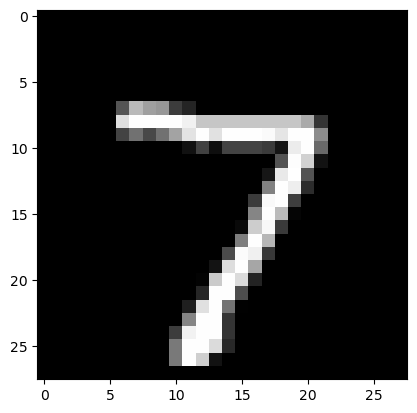

In [102]:
plt.imshow(X_test[0],cmap="gray")
y_test[0]

7

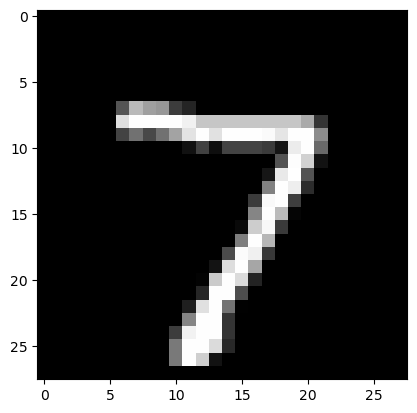

In [104]:
#Scalling each train and test data
X_train_scaled = X_train/255
X_test_scaled=X_test/255

plt.imshow(X_test_scaled[0],cmap="gray")
y_test[0]

In [106]:
X_train_scaled.shape, X_test_scaled.shape

((60000, 28, 28), (10000, 28, 28))

In [108]:
## Reshaping values
X_train_reshape = X_train_scaled.reshape(60000,784)
X_test_reshape = X_test_scaled.reshape(10000,784)

In [110]:
X_train_reshape.shape, X_test_reshape.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [80]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [84]:
## creating ANN model
model = Sequential([
    (Dense(units=100, activation="relu", input_shape=(784,))),
    (Dense(units=100, activation="relu")),
    (Dense(units=10,activation="softmax"))
])

In [86]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [90]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)

In [114]:
history = model.fit(X_train_reshape,y_train,epochs=50,validation_data=(X_test_reshape,y_test),callbacks=[early_stopping])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8748 - loss: 0.4330 - val_accuracy: 0.9590 - val_loss: 0.1382
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9682 - loss: 0.1083 - val_accuracy: 0.9708 - val_loss: 0.0969
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9781 - loss: 0.0708 - val_accuracy: 0.9714 - val_loss: 0.0947
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9828 - loss: 0.0544 - val_accuracy: 0.9749 - val_loss: 0.0874
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9851 - loss: 0.0440 - val_accuracy: 0.9757 - val_loss: 0.0831
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9895 - loss: 0.0349 - val_accuracy: 0.9716 - val_loss: 0.1006
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9909 - loss: 0.0288 - val_accuracy: 0.9740 - val_loss: 0.0945
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9922 - loss: 0.0226 - 

In [118]:
output = np.argmax(model.predict(X_test_reshape[0].reshape(1,784)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [120]:
output

7

In [122]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [124]:
prediction = model.predict(X_test_reshape[:9]) # shape (9,784)
final_prediction = np.argmax(prediction,axis=1)
final_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5], dtype=int64)